In [ ]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}!kill -9 -1MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=b1ed06b6a1c72f39fc9c39c2afe2cf327b70f9840ad69b568886090c1b4edd50
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
Gen RAM Free: 11.4 GB  | Proc size: 1.4 GB
GPU RAM Free: 14792MB | Used: 309MB | Util   2% | Total 15360!kill -9 -1MB


In [ ]:
!kill -9 -1

In [ ]:
import datetime
from google.colab import drive
from time import time
from datetime import datetime
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filtered_works = pd.read_csv("/content/drive/MyDrive/NREGAproject/newestfilteredworks.csv", index_col=0, parse_dates=True)
# filtered_works = filtered_works.drop(['workcode', 'work_name', 'sno.', '_merge', 'index', 'work_status', 'bhu_creationtime', 'bhu_serial_no', 'bhu_collection_sno', 'sanction_amount_in(lakh.)'
# ,'total_amount_paid_since_inception_in(lakh.)', 'master_work_category_name', 'total_mandays', 'no._of_units', 'is_secure', 'is_convergence', 'bhu_accuracy', 'bhu_observername'
# ,'bhu_path1', 'bhu_path2', 'agency_name'], axis=1)
filtered_works['district_name'] = filtered_works['district_name'].str.lower()
filtered_works['block_name'] = filtered_works['block_name'].str.lower()
filtered_works['map_gpname'] = filtered_works['map_gpname'].str.lower()
filtered_works['work_physically/_completed_date'] = pd.to_datetime(filtered_works['work_physically/_completed_date'])
filtered_works['work_started_date'] = pd.to_datetime(filtered_works['work_started_date'])
listofgps= filtered_works['map_gpname'].unique()

<ipython-input-5-e313472d227a>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_works['work_physically/_completed_date'] = pd.to_datetime(filtered_works['work_physically/_completed_date'])
<ipython-input-5-e313472d227a>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_works['work_started_date'] = pd.to_datetime(filtered_works['work_started_date'])


In [ ]:
listofgps

array(['abludu', 'handiganala', nan, 'anur', 'baktharahalli',
       'bashetnahalli', 'thimmanayakanahalli', 'chimangala',
       'devaramaulur', 'dibburahalli', 'talakayalabetta',
       'doddathekalahalli', 'palicherlu', 'ganjigunta', 'kundalagurki',
       'hosahudya', 'melur', 'jangamakote', 'hospate', 'kothanur',
       'y.hunasenahalli', 'kumbiganahalli', 'malamachanahalli', 'mallur',
       'nagamangala', 's.devaganahalli', 'sadali', 'thammanahalli',
       'thimmasandra', 'venkatapura', 'anoor', 'batlahallai',
       'bhoomishettihalli', 'mindigal', 'burudagunte', 'chinnasandra',
       'enigadale', 'hirekattigenahalli', 'irgampalli', 'raguttahalli',
       'kadadanamari', 'kaiwara', 'kattariguppe', 'korlaparthi',
       'kencharlahalli', 'kotagal', 'doddaganjur', 'munaganahalli',
       'nandiganahalli', 'santhekallahalli', 'upperpete', 'shettihalli',
       'talagavara', 'ulavadi', 'konapalli', 'yagavakote', 'billur',
       'chakavelu', 'puligallu', 'racheravu', 'nallagutlap

In [ ]:
len(listofgps)

238

In [ ]:
def extractdates(gp):
  gp_lower = gp.lower()
  assetinfo1 = filtered_works[filtered_works['map_gpname'] == gp_lower] #139 rows
  max1 = assetinfo1['work_physically/_completed_date'].max()
  maxdate1 = max1.strftime('%Y-%m-%d')
  maxyr1 = str(max1.year)
  min1 = assetinfo1['work_started_date'].min()
  mindate1 = min1.strftime('%Y-%m-%d')
  minyr1 = str(min1.year)
  month1 = str(min1.month)
  # print(month1)
  # print(minyr1, maxyr1)
  arrmin = mindate1.split('-')
  mindate1 = arrmin[0] + '-' + arrmin[1] + '-01'
  arrmax = maxdate1.split('-')
  maxdate1 = arrmax[0] + '-' + arrmax[1] + '-01'
  # print(mindate1, maxdate1)#dates of availability of assets

  return [minyr1, maxyr1, mindate1, maxdate1]

In [ ]:
ndvi = pd.read_csv('/content/drive/MyDrive/NREGAproject/daily-ndvi.csv')
rainfall = pd.read_csv('/content/drive/MyDrive/NREGAproject/cds-precipitation-radiation.csv')

In [ ]:
rainfall.head()

,system:index,date,gp,surface_net_solar_radiation,total_precipitation,.geo
0,20000101T23_0,2000-01-01T23:00:00,Chelur,1.071369e+07,0.000454,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,20000101T23_1,2000-01-01T23:00:00,Kothakote,1.133238e+07,0.000311,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,20000101T23_2,2000-01-01T23:00:00,Mittemari,1.168737e+07,0.000265,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,20000101T23_3,2000-01-01T23:00:00,Nandi,1.308732e+07,0.000077,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,20000101T23_4,2000-01-01T23:00:00,Doddaganjur,1.104945e+07,0.000461,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [ ]:
rainfall = rainfall.drop(['surface_net_solar_radiation', '.geo', 'system:index'], axis=1)
ndvi['date'] = pd.to_datetime(ndvi['date'])

In [ ]:
def calculate_multi_year_mean(row, df):
  current_month = row['month']
  past_multi_year_values = df[(df['month'] == current_month) & (df['year'] < row['year'])]['monthly_NDVI']
  return past_multi_year_values.mean()

In [ ]:
def preprocessing(gp, rainfall):
  # ndvi = pd.read_csv('/content/drive/MyDrive/NREGAproject/daily-ndvi.csv')
  # rainfall = pd.read_csv('/content/drive/MyDrive/NREGAproject/cds-precipitation-radiation.csv')
  # rainfall.drop(['surface_net_solar_radiation', '.geo', 'system:index'], axis=1)
  global ndvi
  rainfall1 = rainfall.pivot_table(values='total_precipitation', columns='gp', index='date')
  rainfall1.reset_index(inplace= True)
  rainfall1 = rainfall1.rename_axis(None, axis=1)
  rainfall1['date'] = pd.to_datetime(rainfall1['date'], format="%Y-%m-%d").dt.date
  if gp in ndvi.columns:
      ndvi_abludu = ndvi.loc[:, ['date', gp]]
      ndvi_abludu.rename(columns = {gp :'monthly_NDVI'}, inplace = True)
      rainfall_abludu = rainfall1.loc[:, ['date', gp]]
      rainfall_abludu.rename(columns = {gp :'monthly_rainfall'}, inplace = True)
      mylist = extractdates(gp)

      ndvi_abludu['date'] = pd.to_datetime(ndvi_abludu['date'])
      ndvi_albudu = ndvi_abludu.resample('1M', on='date').mean()
      rainfall_abludu['date'] = pd.to_datetime(rainfall_abludu['date'])
      rainfall_abludu = rainfall_abludu.resample('1M', on='date').mean()
      merged = pd.merge(rainfall_abludu, ndvi_abludu, how='outer', on='date').dropna()
      merged['date'] = pd.to_datetime(merged['date'])
      merged.set_index('date', inplace=True)
      # merged.reset_index(inplace = True)
      merged.index = pd.to_datetime(merged.index)
      merged['hour'] = merged.index.hour
      merged['dayofweek'] = merged.index.dayofweek
      merged['quarter'] = merged.index.quarter
      merged['month'] = merged.index.month
      merged['year'] = merged.index.year
      merged['dayofyear'] = merged.index.dayofyear
      #merged['sin_day'] = np.sin(merged.index)
      #merged['cos_day'] = np.cos(merged.index)
      merged['dayofmonth'] = merged.index.day
      merged['weekofyear'] = merged.index.weekofyear
      merged['monthly_rainfall_prev2'] = merged['monthly_rainfall'].shift(2)
      merged['monthly_NDVI_prev1'] = merged['monthly_NDVI'].shift(1)
      merged['monthly_NDVI_prev1'].iat[0] = merged['monthly_NDVI_prev1'].iat[1]
      merged['monthly_rainfall_prev2'].iat[0] = merged['monthly_rainfall'].iat[2]
      merged['monthly_rainfall_prev2'].iat[1] = merged['monthly_rainfall'].iat[2]


      # Add the multi-year mean as a new column
      merged['MultiYearMeanNDVI'] = merged.apply(lambda row: calculate_multi_year_mean(row, merged), axis=1)

      ndvi_before =merged[merged['year'] < int(mylist[0])]
      ndvi_after =merged[merged['year'] >= int(mylist[0])]

      return [ndvi_before, ndvi_after]

In [ ]:
with plt.style.context(['seaborn-colorblind', 'seaborn-paper']):
  # fig = plt.figure(figsize=(8, 6))
  ax = plot_importance(reg, height=0.9)
  ax.figure.tight_layout()
  plt.ylabel("Features", rotation=0, fontsize=11)
  plt.xlabel("F scores", rotation=0,fontsize=11)
  ax.yaxis.set_label_coords(-0.1,0.95)
  ax.tick_params(axis='both', which='major', labelsize=10)
  ax.set_title("Feature Importance", fontsize=12)
  plt.xticks(range(0, 400,50))

# ax.figure.savefig('feature2.svg')
# from google.colab import files
# files.download("feature2.svg")

NameError: ignored

In [ ]:
def graphdataset(dataset, gp):
  f = plt.figure()
  f.set_figwidth(15)
  f.set_figheight(4)

  ax1 = plt.subplot()
  l1, = ax1.plot(dataset['daily_NDVI'], color='green')
  ax2 = ax1.twinx()
  l2, = ax2.plot(dataset['daily_rainfall'], color='blue')
  ax1.set_xlabel('Years')
  ax1.set_ylabel('daily NDVI')
  ax2.set_ylabel('daily rainfall (m)')

  plt.legend([l1, l2], ["daily NDVI over the years in " + gp, " daily rainfall over the years"], bbox_to_anchor =(0.65, 1.25))
  plt.show()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from math import sqrt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
!pip install scipy
import scipy.stats as stats
# from scipy.stats import wilcoxon

In [ ]:
!pip install pymannkendall
import pymannkendall as mk

In [ ]:
from xgboost import plot_importance, plot_tree

In [ ]:
def dumbxgboostmodel(databefore, dataafter):
  # Extract features and target variable
  # X = databefore.drop(columns=['monthly_NDVI'])
  # y = databefore['monthly_NDVI']
  X_locked_test = dataafter.drop(columns=['monthly_NDVI'])
  y_locked_test = dataafter['monthly_NDVI']

  # Calculate the index to split the data
  split_index = int(len(databefore) * 0.9)

  # Split the data
  train_data = databefore.iloc[:split_index]
  test_data = databefore.iloc[split_index:]

  # Extract features and target variable for training set
  X_train = train_data.drop(columns=['monthly_NDVI'])
  y_train = train_data['monthly_NDVI']

  # Extract features and target variable for test set
  X_test = test_data.drop(columns=['monthly_NDVI'])
  y_test = test_data['monthly_NDVI']

  # Initialize XGBoost model
  model = XGBRegressor()

  # Set up time series cross-validation
  tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits

  # print(tscv)
  # Initialize the XGBoost model
  xgb_model = XGBRegressor()  # You can adjust hyperparameters here

  # param_grid = {
  #   'learning_rate': [0.01, 0.1, 0.2],
  #   'max_depth': [3, 5, 7],
  #   'n_estimators': [50, 100, 200],
  #   'subsample': [0.8, 0.9, 1.0],
  #   'colsample_bytree': [0.8, 0.9, 1.0],
  #   # Add more parameters as needed
  # }

  param_dist = {
    'learning_rate': np.arange(0.01, 0.3, 0.01),
    'max_depth': np.arange(3, 8),
    'n_estimators': np.arange(50, 201, 50),
    'subsample': np.arange(0.8, 1.01, 0.1),
    'colsample_bytree': np.arange(0.8, 1.01, 0.1),
    # Add more parameters as needed
  }

  # grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
  # grid_search.fit(X, y)
  #   best_params = grid_search.best_params_
  # print("Best Hyperparameters:", best_params)


  random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring='neg_mean_squared_error',
    cv=tscv,
    n_iter=10,  # You can adjust the number of iterations
    random_state=42,
    verbose=1
  )

  # Fit the RandomizedSearchCV
  random_search.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = random_search.best_params_
  # print("Best Hyperparameters:", best_params)

  model = XGBRegressor(**best_params)
  #train the model
  model.fit(X_train, y_train)

  # Make predictions on the validation set
  y_pred = model.predict(X_test)

  # with plt.style.context(['seaborn-colorblind', 'seaborn-paper']):
  # # fig = plt.figure(figsize=(8, 6))
  #   ax = plot_importance(model, height=0.9)
  #   ax.figure.tight_layout()
  #   plt.ylabel("Features", rotation=0, fontsize=11)
  #   plt.xlabel("F scores", rotation=0,fontsize=11)
  #   ax.yaxis.set_label_coords(-0.15,1.0)
  #   ax.tick_params(axis='both', which='major', labelsize=10)
  #   ax.set_title("Feature Importance", fontsize=12)
  #   plt.xticks(range(0, 400,50))

  #   ax.figure.savefig('plot_importance.svg')
  #   from google.colab import files
  #   files.download("plot_importance.svg")
  # Evaluate the model
  # r2 = r2_score(y_test, y_pred)
  # rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  # mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

  # # Print the evaluation metrics
  # # print(f'R2 Score: {r2}')
  # # print(f'RMSE: {rmse}')
  # # print(f'MAPE: {mape}')

  y_locked_pred = model.predict(X_locked_test)
  rmseafter = mean_squared_error(y_locked_test, y_locked_pred, squared=False)
  r2after = r2_score(y_locked_test, y_locked_pred)
  mapeafter = np.mean(np.abs((y_locked_test - y_locked_pred) / y_locked_test)) * 100

  # # print(f'after MAPE: {mapeafter}')
  # # print(f'after RMSE: {rmseafter}')
  # # print(f'after R2 Score: {r2after}')

  # #test is with the assets so should be higher. pred is without the assets so should be lower
  # #‘less’: the mean of the distribution underlying the first sample (pred) is less than the mean of the distribution underlying the second sample (test).
  # t_stat, tpvalue = stats.ttest_rel(y_locked_pred, y_locked_test, alternative='less')
  # # print('t-statistics:',t_stat, '\np-value:', tpvalue)

  difference = y_locked_test - y_locked_pred #should be positive
  # mkres = mk.seasonal_test(difference)

  with plt.style.context(['seaborn-colorblind', 'seaborn-paper']):
    plt.plot(X_locked_test.index.values, difference)
    plt.legend()
    # ax.figure.tight_layout()
    plt.ylabel("Difference in NDVI post-intervention", rotation=90, fontsize=11)
    plt.xlabel("years after asset creation", rotation=0,fontsize=11)

    plt.savefig('xgboostdiff.svg', format='svg', bbox_inches='tight')
    from google.colab import files
    files.download("xgboostdiff.svg")


  # senslope = mkres.slope
  # zstat = mkres.z

  # if senslope >= 0.0005 and zstat >= 1.96:
  #     level = 5
  # elif senslope >= 0.0005 and abs(zstat) < 1.96:
  #     level = 4
  # elif abs(senslope) < 0.0005 and abs(zstat) < 1.96:
  #     level = 3
  # elif senslope < -0.0005 and abs(zstat) < 1.96:
  #     level = 2
  # elif senslope < -0.0005 and zstat <= -1.96:
  #     level = 1
  # else:
  #     level = 0

  # # Assuming y_test_locked and y_pred_locked are your two series
  # # wilcox_stat, wilcoxpvalue = wilcoxon(y_locked_test, y_locked_pred)

  # # Print the results
  # # print(f"Wilcoxon signed-rank test statistic: {wilcox_stat}")
  # # print(f"P-value: {wilcoxpvalue}")
  # # Check the p-value to determine significance
  # # if wilcoxpvalue < 0.05:
  # #     print("The difference in trends is statistically significant.")
  # # else:
  # #     print("There is no significant difference in trends.")

  # return [r2, rmse, mape, r2after, rmseafter, mapeafter, t_stat, tpvalue, mkres.trend, mkres.h, mkres.p, mkres.z, mkres.Tau, mkres.s, mkres.var_s, mkres.slope, mkres.intercept, level]

In [ ]:
gp = 'Addagal'
gp = gp.capitalize()
mydatasets = preprocessing(gp, rainfall)

<ipython-input-10-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

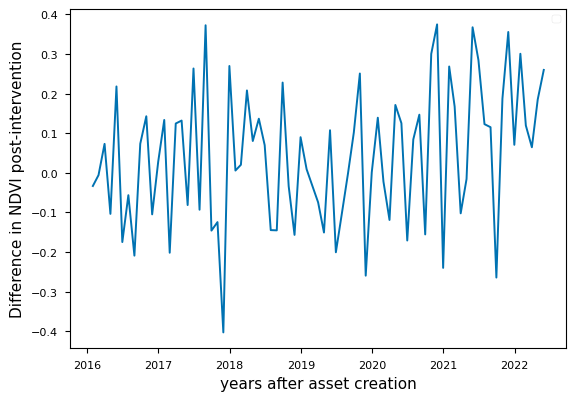

In [ ]:
dumbxgboostmodel(mydatasets[0], mydatasets[1])

In [ ]:
def xgboostmodel(databefore, dataafter):
  # Extract features and target variable
  # X = databefore.drop(columns=['monthly_NDVI'])
  # y = databefore['monthly_NDVI']
  X_locked_test = dataafter.drop(columns=['monthly_NDVI'])
  y_locked_test = dataafter['monthly_NDVI']

  # Calculate the index to split the data
  split_index = int(len(databefore) * 0.9)

  # Split the data
  train_data = databefore.iloc[:split_index]
  test_data = databefore.iloc[split_index:]

  # Extract features and target variable for training set
  X_train = train_data.drop(columns=['monthly_NDVI'])
  y_train = train_data['monthly_NDVI']

  # Extract features and target variable for test set
  X_test = test_data.drop(columns=['monthly_NDVI'])
  y_test = test_data['monthly_NDVI']

  # Initialize XGBoost model
  model = XGBRegressor()

  # Set up time series cross-validation
  tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits

  # print(tscv)
  # Initialize the XGBoost model
  xgb_model = XGBRegressor()  # You can adjust hyperparameters here

  # param_grid = {
  #   'learning_rate': [0.01, 0.1, 0.2],
  #   'max_depth': [3, 5, 7],
  #   'n_estimators': [50, 100, 200],
  #   'subsample': [0.8, 0.9, 1.0],
  #   'colsample_bytree': [0.8, 0.9, 1.0],
  #   # Add more parameters as needed
  # }

  param_dist = {
    'learning_rate': np.arange(0.01, 0.3, 0.01),
    'max_depth': np.arange(3, 8),
    'n_estimators': np.arange(50, 201, 50),
    'subsample': np.arange(0.8, 1.01, 0.1),
    'colsample_bytree': np.arange(0.8, 1.01, 0.1),
    # Add more parameters as needed
  }

  # grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
  # grid_search.fit(X, y)
  #   best_params = grid_search.best_params_
  # print("Best Hyperparameters:", best_params)


  random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring='neg_mean_squared_error',
    cv=tscv,
    n_iter=10,  # You can adjust the number of iterations
    random_state=42,
    verbose=1
  )

  # Fit the RandomizedSearchCV
  random_search.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = random_search.best_params_
  # print("Best Hyperparameters:", best_params)

  model = XGBRegressor(**best_params)
  #train the model
  model.fit(X_train, y_train)

  # Make predictions on the validation set
  y_pred = model.predict(X_test)

  # with plt.style.context(['seaborn-colorblind', 'seaborn-paper']):
  # # fig = plt.figure(figsize=(8, 6))
  # ax = plot_importance(reg, height=0.9)
  # ax.figure.tight_layout()
  # plt.ylabel("Features", rotation=0, fontsize=11)
  # plt.xlabel("F scores", rotation=0,fontsize=11)
  # ax.yaxis.set_label_coords(-0.1,0.95)
  # ax.tick_params(axis='both', which='major', labelsize=10)
  # ax.set_title("Feature Importance", fontsize=12)
  # plt.xticks(range(0, 400,50))

# ax.figure.savefig('feature2.svg')
# from google.colab import files
# files.download("feature2.svg")

  # Evaluate the model
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

  # Print the evaluation metrics
  # print(f'R2 Score: {r2}')
  # print(f'RMSE: {rmse}')
  # print(f'MAPE: {mape}')

  y_locked_pred = model.predict(X_locked_test)
  rmseafter = mean_squared_error(y_locked_test, y_locked_pred, squared=False)
  r2after = r2_score(y_locked_test, y_locked_pred)
  mapeafter = np.mean(np.abs((y_locked_test - y_locked_pred) / y_locked_test)) * 100

  # print(f'after MAPE: {mapeafter}')
  # print(f'after RMSE: {rmseafter}')
  # print(f'after R2 Score: {r2after}')

  #test is with the assets so should be higher. pred is without the assets so should be lower
  #‘less’: the mean of the distribution underlying the first sample (pred) is less than the mean of the distribution underlying the second sample (test).
  t_stat, tpvalue = stats.ttest_rel(y_locked_pred, y_locked_test, alternative='less')
  # print('t-statistics:',t_stat, '\np-value:', tpvalue)

  difference = y_locked_test - y_locked_pred #should be positive
  mkres = mk.seasonal_test(difference)

  senslope = mkres.slope
  zstat = mkres.z

  if senslope >= 0.0005 and zstat >= 1.96:
      level = 5
  elif senslope >= 0.0005 and abs(zstat) < 1.96:
      level = 4
  elif abs(senslope) < 0.0005 and abs(zstat) < 1.96:
      level = 3
  elif senslope < -0.0005 and abs(zstat) < 1.96:
      level = 2
  elif senslope < -0.0005 and zstat <= -1.96:
      level = 1
  else:
      level = 0

  # Assuming y_test_locked and y_pred_locked are your two series
  # wilcox_stat, wilcoxpvalue = wilcoxon(y_locked_test, y_locked_pred)

  # Print the results
  # print(f"Wilcoxon signed-rank test statistic: {wilcox_stat}")
  # print(f"P-value: {wilcoxpvalue}")
  # Check the p-value to determine significance
  # if wilcoxpvalue < 0.05:
  #     print("The difference in trends is statistically significant.")
  # else:
  #     print("There is no significant difference in trends.")

  return [r2, rmse, mape, r2after, rmseafter, mapeafter, t_stat, tpvalue, mkres.trend, mkres.h, mkres.p, mkres.z, mkres.Tau, mkres.s, mkres.var_s, mkres.slope, mkres.intercept, level]

And all Mann-Kendall tests return a named tuple which contained:

trend: tells the trend (increasing, decreasing or no trend)
h: True (if trend is present) or False (if the trend is absence)
p: p-value of the significance test
z: normalized test statistics
Tau: Kendall Tau
s: Mann-Kendal's score
var_s: Variance S
slope: Theil-Sen estimator/slope
intercept: intercept of Kendall-Theil Robust Line, for seasonal test, full period cycle consider as unit time step
sen's slope function required data vector. seasonal sen's slope also has optional input period, which by the default value is 12. Both sen's slope function return only slope value.

Null Hypothesis: The means of y_locked_pred and y_locked_test are equal.
Alternative Hypothesis: The mean of y_locked_pred is less than the mean of y_locked_test.
If the p-value is less than your chosen significance level (commonly 0.05), you reject the null hypothesis and conclude that there is evidence to suggest that the mean of y_locked_pred is less than the mean of y_locked_test.



In [ ]:
# df = pd.DataFrame(columns=['gpname','pbefore','pafter'])
# gp = 'Hospate'
# gp = gp.capitalize()
# mydatasets = preprocessing(gp, rainfall)

In [ ]:
# mydatasets[1].tail()

In [ ]:
# if mydatasets is not None:
#   xgboostmodel(mydatasets[0], mydatasets[1])

In [ ]:
df = pd.DataFrame(columns=['gpname','r2 before','rmse before', 'mape before', 'r2 after', 'rmse after', 'mape after', 't_stat', 'tpvalue', 'trend', 'h', 'pvaluemk', 'z', 'tau', 's', 'var_s', 'slope', 'intercept', 'level'])
#r2, rmse, mape, r2after, rmseafter, mapeafter, t_stat, tpvalue, mkres.trend, mkres.h, mkres.p, mkres.z, mkres.Tau, mkres.s, mkres.var_s, mkres.slope, mkres.intercept, level
for gp in listofgps:
  if isinstance(gp, str):
    gp = gp.capitalize()
    mydatasets = preprocessing(gp, rainfall)
    if mydatasets is None:
      continue
    else:
      myvals = xgboostmodel(mydatasets[0], mydatasets[1])
      df.loc[len(df.index)] = [gp, myvals[0], myvals[1], myvals[2], myvals[3], myvals[4], myvals[5], myvals[6], myvals[7], myvals[8], myvals[9], myvals[10], myvals[11], myvals[12], myvals[13], myvals[14], myvals[15], myvals[16], myvals[17]]

<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['date'] = pd.to_datetime(merged['date'])
<ipython-input-22-33222dd7b0fe>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['hour'] = merged.index.hour
<ipython-input-22-33222dd7b0fe>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['date'] = pd.to_datetime(merged['date'])
<ipython-input-22-33222dd7b0fe>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['hour'] = merged.index.hour
<ipython-input-22-33222dd7b0fe>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-22-33222dd7b0fe>:35: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged['weekofyear'] = merged.index.weekofyear


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
df.info

<bound method DataFrame.info of               gpname  r2 before  rmse before  mape before  r2 after  \
0             Abludu  -0.162818     0.157331   177.170844 -0.103507   
1        Handiganala  -0.100083     0.163378   180.599317 -0.034998   
2               Anur   0.445849     0.137899  2130.211632 -0.112119   
3      Baktharahalli   0.462569     0.155664  1824.075946 -0.053697   
4      Bashetnahalli  -0.153647     0.150123   113.613215  0.010359   
..               ...        ...          ...          ...       ...   
220  Chaldiganahalli   0.291884     0.126342   130.696706 -0.035524   
221      Abbenahalli   0.263161     0.125965   114.400596 -0.105146   
222       Soolikunte  -0.034705     0.170643   229.135071  0.108903   
223        Mavahalli  -0.122266     0.164303   273.277272  0.149514   
224         Madivala  -0.122518     0.186351   199.677198  0.048793   

     rmse after  mape after    t_stat   tpvalue     trend      h  pvaluemk  \
0      0.156201  175.263952 -2.599726

In [ ]:
df[df['level'] == 5].count()

gpname         4
r2 before      4
rmse before    4
mape before    4
r2 after       4
rmse after     4
mape after     4
t_stat         4
tpvalue        4
trend          4
h              4
pvaluemk       4
z              4
tau            4
s              4
var_s          4
slope          4
intercept      4
level          4
dtype: int64

In [ ]:
df[df['level'] == 4].count()

gpname         148
r2 before      148
rmse before    148
mape before    148
r2 after       148
rmse after     148
mape after     148
t_stat         148
tpvalue        148
trend          148
h              148
pvaluemk       148
z              148
tau            148
s              148
var_s          148
slope          148
intercept      148
level          148
dtype: int64

In [ ]:
df[df['level'] == 3].count()

gpname         40
r2 before      40
rmse before    40
mape before    40
r2 after       40
rmse after     40
mape after     40
t_stat         40
tpvalue        40
trend          40
h              40
pvaluemk       40
z              40
tau            40
s              40
var_s          40
slope          40
intercept      40
level          40
dtype: int64

In [ ]:
df[df['level'] == 2].count()

gpname         33
r2 before      33
rmse before    33
mape before    33
r2 after       33
rmse after     33
mape after     33
t_stat         33
tpvalue        33
trend          33
h              33
pvaluemk       33
z              33
tau            33
s              33
var_s          33
slope          33
intercept      33
level          33
dtype: int64

In [ ]:
df[df['level'] == 1].count()

gpname         0
r2 before      0
rmse before    0
mape before    0
r2 after       0
rmse after     0
mape after     0
t_stat         0
tpvalue        0
trend          0
h              0
pvaluemk       0
z              0
tau            0
s              0
var_s          0
slope          0
intercept      0
level          0
dtype: int64

In [ ]:
df[df['level'] == 0].count()

gpname         0
r2 before      0
rmse before    0
mape before    0
r2 after       0
rmse after     0
mape after     0
t_stat         0
tpvalue        0
trend          0
h              0
pvaluemk       0
z              0
tau            0
s              0
var_s          0
slope          0
intercept      0
level          0
dtype: int64

In [ ]:
df[df['rmse before'] < df['rmse after']].count()

gpname         109
r2 before      109
rmse before    109
mape before    109
r2 after       109
rmse after     109
mape after     109
t_stat         109
tpvalue        109
trend          109
h              109
pvaluemk       109
z              109
tau            109
s              109
var_s          109
slope          109
intercept      109
level          109
dtype: int64

In [ ]:
df[df['tpvalue'] < 0.05].count()

gpname         26
r2 before      26
rmse before    26
mape before    26
r2 after       26
rmse after     26
mape after     26
t_stat         26
tpvalue        26
trend          26
h              26
pvaluemk       26
z              26
tau            26
s              26
var_s          26
slope          26
intercept      26
level          26
dtype: int64

In [ ]:
df[df['level'] >= 4].count()

gpname         125
r2 before      125
rmse before    125
mape before    125
r2 after       125
rmse after     125
mape after     125
t_stat         125
tpvalue        125
trend          125
h              125
pvaluemk       125
z              125
tau            125
s              125
var_s          125
slope          125
intercept      125
level          125
dtype: int64

In [ ]:
# Assuming df is your DataFrame
df.to_csv('/content/drive/MyDrive/NREGAproject/xgboostmodularizedfinal.csv', index=False)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NREGAproject/xgboostmodularized.csv', index_col=0, parse_dates=True)

In [ ]:
df[df['r2 before'] > df['r2 after']].count()

r2 before      147
rmse before    147
mape before    147
r2 after       147
rmse after     147
mape after     147
t_stat         147
tpvalue        147
trend          147
h              147
pvaluemk       147
z              147
tau            147
s              147
var_s          147
slope          147
intercept      147
level          147
dtype: int64

In [ ]:
df[(df['rmse before'] < 0.15)].count()

r2 before      114
rmse before    114
mape before    114
r2 after       114
rmse after     114
mape after     114
t_stat         114
tpvalue        114
trend          114
h              114
pvaluemk       114
z              114
tau            114
s              114
var_s          114
slope          114
intercept      114
level          114
dtype: int64

In [ ]:
dfa[dfa['level'] == 5]

,r2 before,rmse before,mape before,r2 after,rmse after,mape after,t_stat,tpvalue,trend,h,pvaluemk,z,tau,s,var_s,slope,intercept,level
gpname,,,,,,,,,,,,,,,,,,
Kattariguppe,-0.195756,0.145748,203.464447,-0.008446,0.145369,182.217965,-1.593311,0.056463,increasing,True,0.047703,1.980006,0.113597,132.0,4377.333333,0.004508,-0.012407,5
Addagal,-0.321694,0.156828,93.502305,-0.129775,0.178420,247.421016,-2.109467,0.019098,increasing,True,0.028108,2.195775,0.219048,46.0,420.000000,0.030329,-0.026165,5
Bylanarasapura,0.357263,0.120645,229.722550,-0.140538,0.153415,367.455776,-1.509439,0.066579,increasing,True,0.031666,2.148607,0.128871,129.0,3549.000000,0.005230,-0.007864,5
Venkatagirikote,0.322252,0.140774,4438.204250,-0.047162,0.142582,127.762751,1.446233,0.924966,increasing,True,0.047620,1.980747,0.118881,119.0,3549.000000,0.003873,-0.039743,5
Mandibele,-0.368433,0.169926,44.072577,-0.233154,0.179622,97.004201,-2.647204,0.004931,increasing,True,0.045436,2.000595,0.200000,42.0,420.000000,0.012958,0.015309,5


In [ ]:
# dfa.head()

In [ ]:
# len(dfa[dfa['r2 before'] > dfa['r2 after']])

In [ ]:
# len(dfa[(dfa['rmse before'] < dfa['rmse after'])])

In [ ]:
# len(dfa[(dfa['mape before'] < dfa['mape after'])])

In [ ]:
# len(dfa[(dfa['r2 before'] > dfa['r2 after']) & (dfa['rmse before'] < dfa['rmse after']) & (dfa['mape before'] < dfa['mape after'])])

In [ ]:
# len(dfa[(dfa['r2 before'] > dfa['r2 after']) & (dfa['mape before'] < dfa['mape after'])])